In [1]:
import matplotlib
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import pickle
import numpy as np
import os
import IPS

In [10]:
res={}
res_dir = '/tmp/sv1358/results'
for directory in os.listdir(res_dir):
    if directory.startswith('.'):
        continue
    with open(res_dir+os.sep+directory+os.sep+'output.pkl','rb+') as pfile:
        try:
            res[directory] = pickle.load(pfile)
        except pickle.UnpicklingError:
            print('error for '+directory)
            continue
#         Xn = res[directory]['Xn']
#         args = res[directory]['args']
#         nfirms = args.nfirms
#         N = nfirms
#         barrier = args.barrier*np.ones(nfirms)
#         defcounts = []
#         for i in range(len(args.alpha)):
#             ndef = IPS.numDefaults(Xn[i][:,-nfirms:],barrier)
#             defcounts_i = np.zeros(N+1)
#             for j in range(N + 1):
#                 ndef_j = (ndef == j)
#                 defcounts_i[j] = ndef_j.sum()
#             defcounts.append(defcounts_i)
#         maxDefAlphaInd = np.argmax(np.vstack(defcounts), axis = 0)
#         res[directory]['pkT'] = np.vstack(res[directory]['default_prob'])[maxDefAlphaInd,np.arange(maxDefAlphaInd.shape[0])]
#         res[directory]['defcounts'] = defcounts
#         pfile.seek(0)
#         pickle.dump(res[directory],pfile)

error for np2000_nf125_T5.0_ns20_sp90_sv0.4_sigma0.4_DVFalse_alpha0.05_0.5_100


<IPython.core.display.Javascript object>


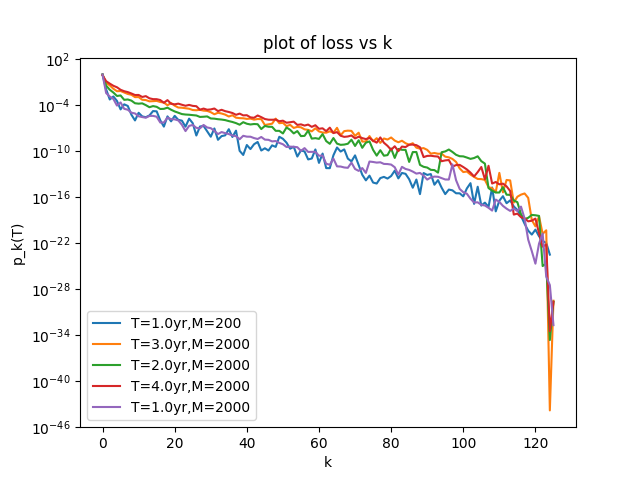

In [11]:
plt.figure()
for key,value in res.items():
    plt.semilogy(np.arange(value['args'].nfirms+1),value['pkT'],label='T='+str(value['args'].maturity)+'yr,M='+str(value['args'].nportfolio))
plt.title('plot of loss vs k')
plt.xlabel('k')
plt.ylabel('p_k(T)')
plt.legend()
plt.show()

In [30]:
fname = 'np200_nf125_T1.0_ns20_sp90_sv0.4_alpha0.05_0.5_100'
#fname = 'np2000_nf125_T1.0_ns20_sp90_sv0.4_sigma0.4_DVFalse_alpha0.05_0.5_100'
defcounts = res[fname]['defcounts']
args = res[fname]['args']
alpha = res[fname]['alpha']
k = np.arange(args.nfirms)+1
A,B = np.meshgrid(alpha,k)
C = np.vstack(defcounts).T

<IPython.core.display.Javascript object>


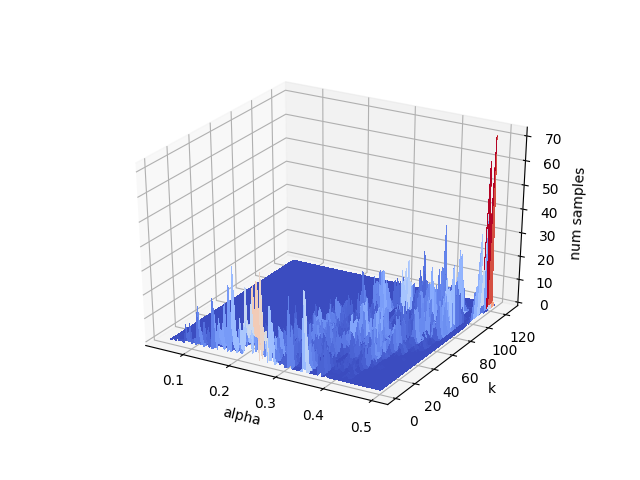

In [31]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A,B,C[1:,:], cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('alpha')
ax.set_ylabel('k')
ax.set_zlabel('num samples')
plt.show()

In [7]:
defcounts[0]

array([ 185.,    8.,    4.,    3.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.])

In [13]:
os.listdir('results')

['np2000_nf125_T2.0_ns20_sp90_sv0.4_alpha0.1_0.4_4',
 '.hidden',
 'np2000_nf125_T3.0_ns20_sp90_sv0.4_alpha0.1_0.4_4',
 'np1000_nf125_T1.0_ns20_sp90_sv0.4_alpha0.1_0.3_3',
 'np2000_nf125_T1.0_ns20_sp90_sv0.4_alpha0.1_0.3_3',
 'np200_nf125_T1.0_ns20_sp90_sv0.4_alpha0.05_0.5_100']

In [19]:
C.shape

(126, 100)